In [3]:
# Libraries
import caveclient
import subprocess
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_copy_paste_annot_list(annot_pt_list = [], mip=(32,32,45), description_list = None, connected=False):
    """ list of annotations to copy/paste to spleunker.cave """
    if description_list == None:
        description_list = ["" for _ in range(len(annot_pt_list))]
    else:
        assert len(annot_pt_list) == len(description_list)

    annots = []
    for i, pt in enumerate(annot_pt_list):
        if connected:
            pt_dict = {
              "pointA": list([int(pt[0][0]/mip[0]), int(pt[0][1]/mip[1]), int(pt[0][2]/mip[2])]),
              "pointB": list([int(pt[1][0]/mip[0]), int(pt[1][1]/mip[1]), int(pt[1][2]/mip[2])]),
              "type": "line",
              "id": "a6f2611ba4basd3635da2ea158ee9853fab0da"+str(i), # random id. Needs to be unique for each annot
              "description": pt[2]
            }
        else:
            pt_dict = {"point": list([int(pt[0]/mip[0]), int(pt[1]/mip[1]), int(pt[2]/mip[2])]), "description": str(description_list[i]), "type": "point", "id": "b6f2611ba4basd3635da2ea158ee9853fab0dabf"+str(i)}
            
        annots.append(pt_dict)
    subprocess.run("pbcopy", text=True, input=json.dumps(annots))
    return annots

In [4]:
client = caveclient.CAVEclient()
client.auth.get_new_token()
client.auth.save_token(token="1d17960488e2427f0ac1bca29a6dc8e6")

### After caveclient token auth

In [25]:
# Setup caveclient
client = caveclient.CAVEclient("wclee_mouse_spinalcord_cltmr", ) #server_address='https://global.daf-apis.com')

In [26]:
client.info.get_datastack_info()

{'aligned_volume': {'id': 13,
  'name': 'wclee_mouse_spinalcord_cltmr',
  'display_name': None,
  'description': None,
  'image_source': 'precomputed://gs://lee-mouse-spinal-cord-001-raw/sharded'},
 'segmentation_source': 'graphene://https://cave.fanc-fly.com/segmentation/table/wclee_mouse_spinalcord_cltmr',
 'skeleton_source': None,
 'analysis_database': None,
 'viewer_site': 'https://spelunker.cave-explorer.org/',
 'synapse_table': None,
 'soma_table': None,
 'local_server': 'https://cave.fanc-fly.com',
 'description': None,
 'viewer_resolution_x': 32.0,
 'viewer_resolution_y': 32.0,
 'viewer_resolution_z': 45.0,
 'proofreading_status_table': None,
 'cell_identification_table': None,
 'proofreading_review_table': None}

In [4]:
# Synapses df
pre_synapses_df = client.materialize.query_table('synapses_v2', filter_equal_dict = {'post_pt_root_id': 720575940912536454})

In [5]:
pre_synapses_df

,id,created,superceded_id,valid,size,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,pre_pt_position,post_pt_position,ctr_pt_position
0,12066612,2025-03-25 13:39:09.340218+00:00,NaN,t,15,74522287864398084,720575940885955766,73536575757118701,720575940912536454,"[304864, 218976, 104085]","[304768, 219232, 103680]","[304672, 219056, 103950]"
1,12982536,2025-03-25 13:39:09.340218+00:00,NaN,t,22,73607561969938222,720575940851947923,73537193091551675,720575940912536454,"[315856, 291904, 14805]","[315904, 292128, 14760]","[315888, 292032, 14715]"
2,13708348,2025-03-25 13:39:09.340218+00:00,NaN,t,4,73746857490198032,720575940380055967,73746857490214144,720575940912536454,"[334848, 116176, 116730]","[334592, 115984, 117090]","[334720, 116112, 116820]"
3,15818175,2025-03-25 13:39:09.340218+00:00,NaN,t,399,74169069888221042,720575940912536454,74169069888221042,720575940912536454,"[375728, 117856, 114255]","[375728, 117856, 114255]","[375808, 117856, 114390]"
4,15896226,2025-03-25 13:39:09.340218+00:00,NaN,t,238,74591419792203675,720575940900740286,74098769930575685,720575940912536454,"[374064, 130960, 116595]","[373744, 130944, 117000]","[373920, 131072, 116775]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4705,37517381,2025-03-25 13:39:09.340218+00:00,NaN,t,910,77124488424170299,720575940862181479,76068888676150364,720575940912536454,"[723296, 116496, 112185]","[722800, 116288, 112365]","[723152, 116352, 112455]"
4706,40600848,2025-03-25 13:39:09.340218+00:00,NaN,t,382,77335663309004553,720575940862181479,76068888676150364,720575940912536454,"[772208, 131872, 109080]","[772464, 131792, 108720]","[772416, 131792, 108900]"
4707,20796901,2025-03-25 13:39:09.340218+00:00,NaN,t,813,74872963689731507,720575940909766104,76068888676150364,720575940912536454,"[459264, 144912, 129690]","[459504, 144416, 129735]","[459696, 144672, 129735]"
4708,35646428,2025-03-25 13:39:09.340218+00:00,NaN,t,553,77124763234902724,720575940918773041,76068888676150364,720575940912536454,"[696208, 147520, 106380]","[695728, 147792, 106290]","[696095, 147551, 106154]"


In [151]:
#len(pre_synapses_df[pre_synapses_df['pre_pt_root_id']==pre_synapses_df['post_pt_root_id']])

In [62]:
# Create a coordinates list
coordinates = []
for i, row in pre_synapses_df.iterrows():
    coordinates.append([row['pre_pt_position'], row['post_pt_position'], row['id']])  

In [64]:
# Use util function to create copy/past version of annots ... paste to NG json file # mip=(2,2,1)
annots = create_copy_paste_annot_list(annot_pt_list = coordinates, mip=(32,32,45), connected=True)

### Size distribution
- Create a size distribution for some true positive synapses vs false synapse prediction

In [80]:
# Get neuroglancer json state
json_state = client.state.get_state_json(4865533464805376) # modify if needed
annots = json_state['layers'][2]['annotations'] # get annotation layer

In [82]:
# Generate some true false size distribution charts
true_synapses, false_synapses  = [], []
for annot in annots:
    if 'description' in annot:
        if annot['description'] == 't':
            true_synapses.append(annot['pointA'])
        elif annot['description'] == 'f':
            false_synapses.append(annot['pointA'])

In [118]:
tolerance = 0.005
def within_range(x, target, tolerance):
    lower_bound = target - target * tolerance
    upper_bound = target + target * tolerance
    return lower_bound <= x <= upper_bound

In [127]:
true_sizes = []
for ts in true_synapses:
    target_list = np.array([ts[0]*32, ts[1]*32, ts[2]*45])
    filtered_df = pre_synapses_df[pre_synapses_df['pre_pt_position'].apply(lambda x: all(within_range(val, target, tolerance) for val, target in zip(x, target_list)))]
    if len(filtered_df) != 0:
        size = filtered_df.iloc[0]['size']
        true_sizes.append(size)

false_sizes = []
for ts in false_synapses:
    target_list = np.array([ts[0]*32, ts[1]*32, ts[2]*45])
    filtered_df = pre_synapses_df[pre_synapses_df['pre_pt_position'].apply(lambda x: all(within_range(val, target, tolerance) for val, target in zip(x, target_list)))]
    if len(filtered_df) != 0:
        size = filtered_df.iloc[0]['size']
        false_sizes.append(size)

true_sizes = np.array(true_sizes)
false_sizes = np.array(false_sizes)

In [142]:
# Add some filter?
true_sizes_temp = true_sizes[true_sizes <= 100]
false_sizes_temp = false_sizes[false_sizes <= 100]

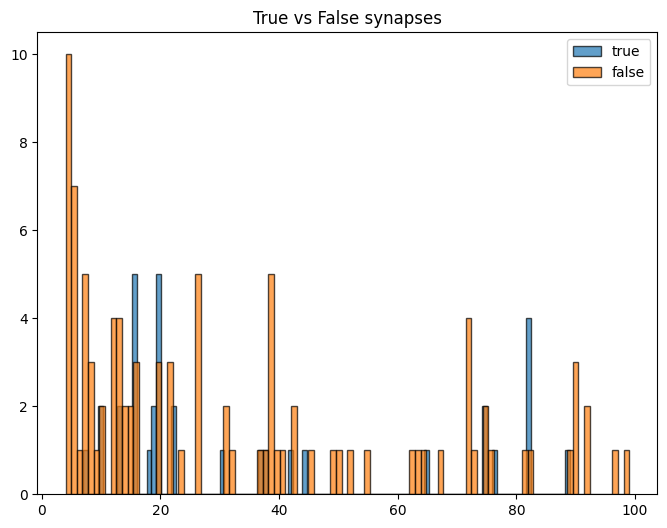

In [143]:
plt.figure(figsize=(8, 6))
plt.hist(true_sizes_temp, bins=100, edgecolor='black', alpha=0.7, label='true')
plt.hist(false_sizes_temp, bins=100, edgecolor='black', alpha=0.7, label='false')
plt.title('True vs False synapses')
plt.legend()

Text(0.5, 1.0, 'Distribution of size for ALL synapses')

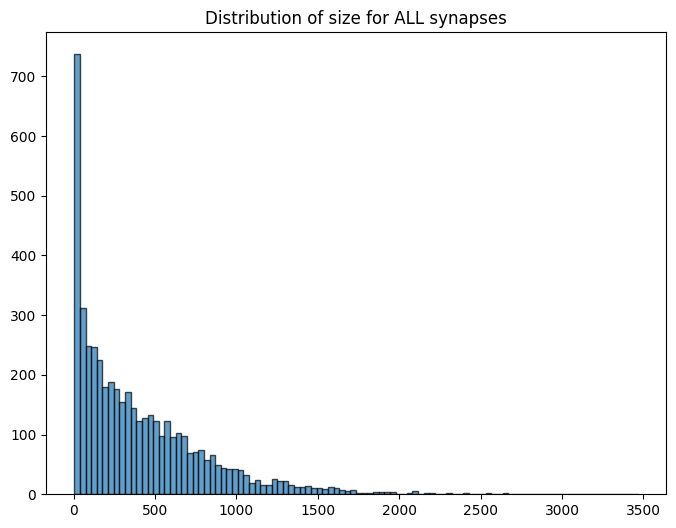

In [134]:
plt.figure(figsize=(8, 6))
plt.hist(pre_synapses_df['size'], bins=100, edgecolor='black', alpha=0.7)
plt.title('Distribution of size for ALL synapses')

### Rest

In [6]:
# Setup caveclient
client = caveclient.CAVEclient("brain_and_nerve_cord")

In [7]:
banc_cell_info = client.materialize.query_table('cell_info')

In [9]:
banc_cell_info['tag2'].unique()

array(['primary class', 'anterior-posterior projection pattern',
       'soma region', 'neuron identity', 'optic lobe intrinsic',
       'CNS neuron', 'transmedullary', 'soma in VNC', 'medulla intrinsic',
       'soma side', 'fast neurotransmitter',
       'left-right projection pattern', 'sensory neuron', 'freeform',
       'glia', 'lobula plate intrinsic', 'body part innervated',
       'efferent neuron', 'innervates leg', 'visual projection',
       'body side innervated', 'chordotonal neuron', 'Y neuron',
       'lobula columnar', 'transmedullary Y', 'other neurotransmitter',
       'distal medulla', 'soma in brain', 'innervates T1 leg',
       'T5 neuron', 'T2 neuron', 'innervates antenna', 'leg local',
       'lobula plate columnar', 'lamina monopolar',
       'lobula plate lobula columnar', 'leg neuromere projection pattern',
       'T1+T2 leg intersegmental', 'leg intersegmental',
       'T2+T3 leg intersegmental', 'tectulum projection pattern',
       'photoreceptor neuron', '

In [11]:
banc_cell_info[banc_cell_info['tag2'] == 'fast neurotransmitter']['tag'].unique()

array(['cholinergic', 'GABAergic', 'glutamatergic'], dtype=object)